<font color='blue'> **part0_01_intro_freyberg_model_B** </font> 

In [1]:
import os ; import pandas as pd ; import matplotlib.pyplot as plt ; from pathlib import Path ; import flopy ; import pyemu  

ref_data  = os.path.join('E:/15_REPOS/01_Beta-Me/data/GMDSI/monthly_model_files_1lyr_newstress&exe')     
ref_data2 = os.path.join('E:/15_REPOS/01_Beta-Me/data/GMDSI/daily_freyberg_mf6_truth')                 
TA        = Path("./_RES/part0_01_intro_freyberg_model_B")                       ; TA.mkdir(exist_ok=True)  ; exe_name = 'E:\\15_REPOS\\00_BETAMI\\bin\\mf6.exe' 
sim       = flopy.mf6.MFSimulation.load(sim_ws=ref_data, verbosity_level=0)      ; gwf = sim.get_model()         
os.startfile('E:/15_REPOS/01_Beta-Me/Beta/part0_01_intro_freyberg_OBS.xlsx')

In [2]:
sim.set_sim_path(TA) ;sim.write_simulation() ;sim.run_simulation(silent=True, report=False)  ; pyemu.os_utils.run(exe_name, cwd=TA) ; 
for i in gwf.obs: print(i.output.obs_names)         

E:\15_REPOS\00_BETAMI\bin\mf6.exe
['sfr.csv']
['heads.csv']


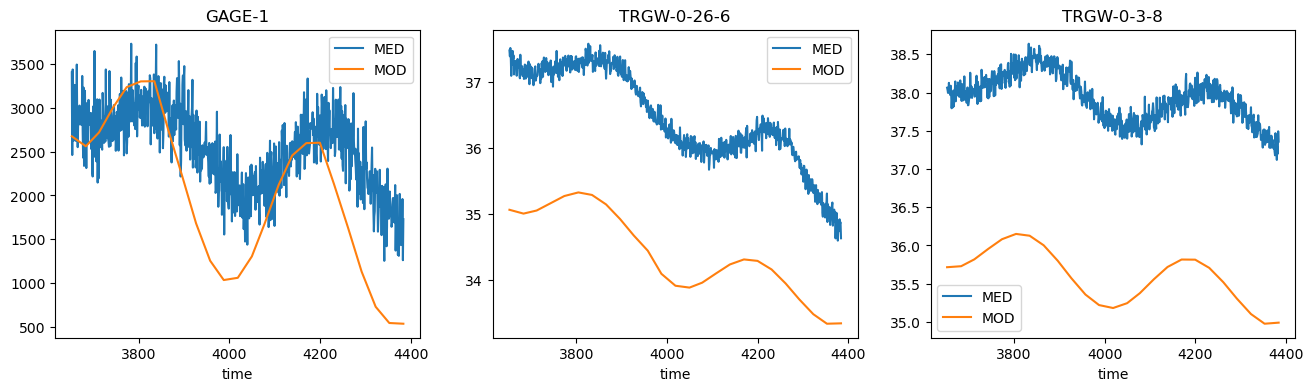

In [3]:
obs_data = pd.read_csv(os.path.join(ref_data2,'obs_data.csv'))    ; obs_data = obs_data.pivot(index='time', columns='site', values='value')    # daily
sfr_obs  = pd.read_csv(os.path.join(TA   ,'sfr.csv'   ))
hds_obs  = pd.read_csv(os.path.join(TA   ,'heads.csv' ))

fig = plt.figure(figsize=(16, 4))                             
ax1 = fig.add_subplot(131) ; obs_data.plot(y='GAGE-1'     , ax=ax1, label='MED') ; sfr_obs.plot(x='time', y='GAGE-1'     , ax=ax1, label='MOD') ;  ax1.set_title('GAGE-1')
ax1 = fig.add_subplot(132) ; obs_data.plot(y='TRGW-0-26-6', ax=ax1, label='MED') ; hds_obs.plot(x='time', y='TRGW-0-26-6', ax=ax1, label='MOD') ;  ax1.set_title('TRGW-0-26-6')
ax1 = fig.add_subplot(133) ; obs_data.plot(y='TRGW-0-3-8' , ax=ax1, label='MED') ; hds_obs.plot(x='time', y='TRGW-0-3-8' , ax=ax1, label='MOD') ;  ax1.set_title('TRGW-0-3-8')
plt.show()

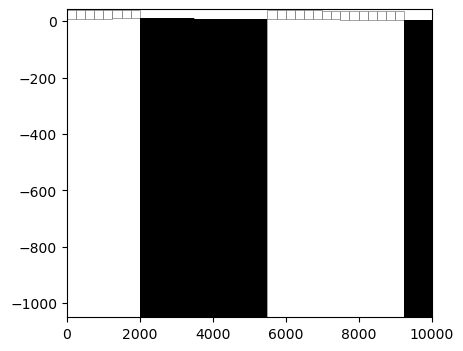

In [4]:
irow, icol = gwf.modelgrid.intersect(1200, 100) 
fig = plt.figure(figsize=(16, 4))  
ax = fig.add_subplot(131) ; pmv=flopy.plot.PlotCrossSection(model=gwf,ax=ax, line={"column": icol})  
pmv.plot_grid(linewidth=0.5) ; pmv.plot_inactive() ; plt.show()